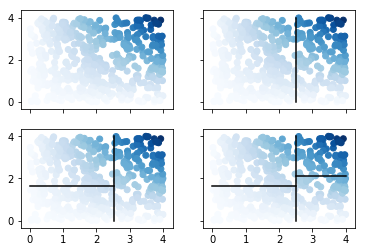

In [208]:
np.random.seed(seed=14)
x = np.random.uniform(low=0, high=4, size=(500,))
np.random.seed(seed=15)
y = np.random.uniform(low=0, high=4, size=(500,))
#x,y = np.meshgrid(x,y)
z = x*y

x_joined = np.column_stack((x, y))
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(x_joined, z)

# da se zobrazit na http://webgraphviz.com/
#print(tree.export_graphviz(clf, out_file=None, feature_names=['x1','x2']))

c_map = 'Blues'
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(x, y, c=z, cmap=c_map)
ax2.scatter(x, y, c=z, cmap=c_map)
ax2.plot([2.5216, 2.5216], [0,4], color='black')
ax3.scatter(x, y, c=z, cmap=c_map)
ax3.plot([2.5216, 2.5216], [0,4], color='black')
ax3.plot([0, 2.5216], [1.6366, 1.6366], color='black')
ax4.scatter(x, y, c=z, cmap=c_map)
ax4.plot([2.5216, 2.5216], [0,4], color='black')
ax4.plot([0, 2.5216], [1.6366, 1.6366], color='black')
ax4.plot([2.5216, 4], [2.1089, 2.1089], color='black')

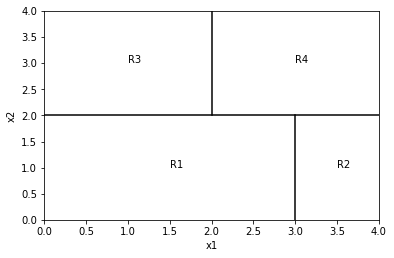

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.text(1.5, 1, 'R1')
ax.text(3.5, 1, 'R2')
ax.text(1, 3, 'R3')
ax.text(3, 3, 'R4')
ax.axis([0, 4, 0, 4])

plt.plot([0,4],[2,2], color='black')
plt.plot([3,3],[0,2], color='black')
plt.plot([2,2],[2,4], color='black')
plt.show()

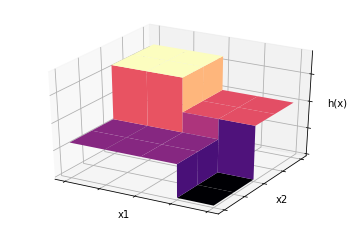

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import mpl
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# def figsize(scale):
#     fig_width_pt = 412.56496                          # Get this from LaTeX using \the\textwidth
#     inches_per_pt = 1.0/72.27                       # Convert pt to inch
#     golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
#     fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
#     fig_height = fig_width*golden_mean              # height in inches
#     fig_size = [fig_width,fig_height]
#     return fig_size

# pgf_with_latex = {                      # setup matplotlib to use latex for output
#     "pgf.texsystem": "xelatex",        # change this if using xetex or lautex
#     "text.usetex": True,                # use LaTeX to write all text
#     "font.family": "serif",
#     "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
#     "font.sans-serif": [],
#     "font.monospace": [],
#     "axes.labelsize": 10,               # LaTeX default is 10pt font.
#     "text.fontsize": 10,
#     "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "figure.figsize": figsize(0.48),     # default fig size of 0.9 textwidth
#     "pgf.preamble": [
#         r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
#         r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
#         ]
#     }
#plt.rcParams.update(pgf_with_latex)


fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.array([0,1,2,2.0001,3,3.0001,4])
Y = np.array([0,1,2,2.0001,3,3.0001,4])
X, Y = np.meshgrid(X, Y)
Z = ((Y<=2) * (X<=3))*0.5 + ((Y<=2) * (X>3))*0 + ((Y>2) * (X<=2))*1.3 + ((Y>2) * (X>2))*0.8
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, shade=True, cmap='magma')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('h(x)')
ax.xaxis.labelpad, ax.yaxis.labelpad, ax.zaxis.labelpad = -5, -5, -5
ax.w_xaxis.set_ticklabels([]), ax.w_yaxis.set_ticklabels([]), ax.w_zaxis.set_ticklabels([])
ax.xaxis.set_ticks(np.arange(0, 5, 1)), ax.yaxis.set_ticks(np.arange(0, 5, 1)), ax.zaxis.set_ticks(np.arange(0, 1.5, 0.4))
ax.set_zlim(0, 1.5)


#plt.savefig('example.pgf')
plt.show()

scores
ovo: 0.9066666666666666
ovr: 0.8933333333333333
multinom: 0.9266666666666666


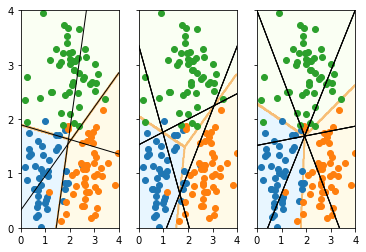

In [210]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

np.random.seed(seed=14)
mean = [1, 1]
cov = [[0.3, 0], [0, 0.3]]
x1x, x1y = np.random.multivariate_normal(mean, cov, 50).T
y1 = 1

mean = [3, 1]
cov = [[0.3, 0], [0, 0.3]]
x2x, x2y = np.random.multivariate_normal(mean, cov, 50).T
y2 = 2

mean = [2, 3]
cov = [[0.3, 0], [0, 0.3]]
x3x, x3y = np.random.multivariate_normal(mean, cov, 50).T
y3 = 3


def line(x0, c, coef, intercept):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

def plot_boundaries(ax, coef, intercept):
    for c in range(3):
        ax.plot((0, 4), (line(0, c, coef, intercept), line(4, c, coef, intercept)), color='black', linewidth=1)
        ax.plot((0, 4), (line(0, c, coef, intercept), line(4, c, coef, intercept)), color='black', linewidth=1)
        ax.plot((0, 4), (line(0, c, coef, intercept), line(4, c, coef, intercept)), color='black', linewidth=1)
    
def plot_points(ax):
    ax.set_xlim(0, 4)
    ax.xaxis.set_ticks([0,1,2,3,4])
    ax.yaxis.set_ticks([0,1,2,3,4])
    ax.set_ylim(0, 4)
    ax.plot(x1x, x1y, 'o')
    ax.plot(x2x, x2y, 'o')
    ax.plot(x3x, x3y, 'o')

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey='row')
plot_points(ax1)

# OVO ##################################################################
cls_ovo1 = LogisticRegression()
train_x = np.column_stack((
    np.concatenate((x1x, x2x)),
    np.concatenate((x1y, x2y))
))
cls_ovo1.fit(train_x, 50*[y1] + 50*[y2])
coef = cls_ovo1.coef_
intercept = cls_ovo1.intercept_
ax1.plot((0, 4), (line(0, 0, coef, intercept), line(4, 0, coef, intercept)), color='black', linewidth=1)

cls_ovo2 = LogisticRegression()
train_x = np.column_stack((
    np.concatenate((x1x, x3x)),
    np.concatenate((x1y, x3y))
))
cls_ovo2.fit(train_x, 50*[y1] + 50*[y3])
coef = cls_ovo2.coef_
intercept = cls_ovo2.intercept_
ax1.plot((0, 4), (line(0, 0, coef, intercept), line(4, 0, coef, intercept)), color='black', linewidth=1)

cls_ovo3 = LogisticRegression()
train_x = np.column_stack((
    np.concatenate((x2x, x3x)),
    np.concatenate((x2y, x3y))
))
cls_ovo3.fit(train_x, 50*[y2] + 50*[y3])
coef = cls_ovo3.coef_
intercept = cls_ovo3.intercept_
ax1.plot((0, 4), (line(0, 0, coef, intercept), line(4, 0, coef, intercept)), color='black', linewidth=1)

##########################################################################
plot_points(ax2)

cls_ovr = LogisticRegression()
train_x = np.column_stack((
    np.concatenate((x1x, x2x, x3x)),
    np.concatenate((x1y, x2y, x3y))
))
cls_ovr.fit(train_x, 50*[y1] + 50*[y2] + 50*[y3])
plot_boundaries(ax2, cls_ovr.coef_, cls_ovr.intercept_)
######################################################################################
plot_points(ax3)
cls_multinom = LogisticRegression(solver='lbfgs', multi_class='multinomial')
train_x = np.column_stack((np.concatenate((x1x, x2x, x3x)),np.concatenate((x1y, x2y, x3y))))
cls_multinom.fit(train_x, 50*[y1] + 50*[y2] + 50*[y3])
plot_boundaries(ax3, cls_multinom.coef_, cls_multinom.intercept_)


def plot_surface(cls, ax, x_min=0,x_max=4, y_min=0, y_max=4, step_size=.02):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='#f7be75', linewidth=3)
    ax.contourf(xx, yy, Z, colors=('#e8f6ff', '#fffae8','#fafff3'), levels=[0,1,2,3])

plot_surface(cls_multinom, ax3)
plot_surface(cls_ovr, ax2)


x_min=y_min=0
x_max=y_max=4
step_size=.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
preds = np.column_stack((
    cls_ovo1.predict(np.c_[xx.ravel(), yy.ravel()]),
    cls_ovo2.predict(np.c_[xx.ravel(), yy.ravel()]),
    cls_ovo3.predict(np.c_[xx.ravel(), yy.ravel()])
))
Z, _ = stats.mode(preds, axis=1)
Z = Z.reshape(xx.shape)
ax1.contour(xx, yy, Z, colors='#f7be75' )
ax1.contourf(xx, yy, Z, colors=('#e8f6ff', '#fffae8','#fafff3'), levels=[0,1,2,3])

preds = np.column_stack((
    cls_ovo1.predict(train_x),
    cls_ovo2.predict(train_x),
    cls_ovo3.predict(train_x)
))
preds, _ = stats.mode(preds, axis=1)
print("scores")
print("ovo: {}".format(metrics.accuracy_score(preds, 50*[y1] + 50*[y2] + 50*[y3])))
print("ovr: {}".format(cls_ovr.score(train_x, 50*[y1] + 50*[y2] + 50*[y3])))
print("multinom: {}".format(cls_multinom.score(train_x, 50*[y1] + 50*[y2] + 50*[y3])))